### Topological Quantum Computing with Anyons

Topological Quantum Computing (TQC) is emerging as a promising approach to building fault-tolerant quantum computers, relying on the unique properties of anyons. Unlike traditional particles, anyons are quasiparticles that exist in two-dimensional systems and exhibit unusual braiding statistics, differing from both fermions and bosons. This distinct behavior is central to TQC, where the quantum state of a system changes based on the path taken when anyons are exchanged. This leads to a robust form of quantum computation, inherently resistant to errors.

In a TQC system, information is encoded in the global state of anyons rather than in individual particles. The computational process involves braiding these anyons around one another, with the resulting quantum operations depending on the braiding pattern. The beauty of this approach lies in its topological protection: the information remains intact despite local disturbances because the global state of the system depends solely on the overall braiding pattern and not on the specific positions of the anyons. This makes TQC highly resilient to decoherence, a common issue in quantum computing where interactions with the environment can rapidly destroy quantum information.

The process of topological quantum computing unfolds in a few key stages. First, anyons are created in pairs and positioned in a two-dimensional plane. The system is initialized in a known quantum state, setting the stage for computation. Next, quantum gates are implemented through the braiding of anyons, with the sequence of braids determining the outcome. The final quantum state, which carries the result of the computation, is read out by fusing the pairs of anyons. The topological nature of these operations ensures that the computation is resistant to small errors, as the global state is governed by the topology of the braiding paths rather than the precise details of the movements.

The potential applications of Topological Quantum Computing are vast, particularly in fields where minimizing errors is crucial. For instance, in quantum cryptography, the robustness of anyonic systems is vital for maintaining coherence over long durations, ensuring secure quantum communication protocols. TQC also holds promise in quantum simulations, especially for simulating systems with topological properties like fractional quantum Hall states. Additionally, fault-tolerant quantum algorithms, such as Shor's algorithm for factoring large numbers, could greatly benefit from the error resilience offered by TQC.

Looking to the future, Topological Quantum Computing is poised for exciting developments, though significant challenges remain. One of the foremost challenges is the physical realization of anyons in a controlled environment. While theoretical models and experiments suggest their existence, particularly in systems exhibiting the fractional quantum Hall effect, reliably creating and manipulating anyons for quantum computation is still an ongoing pursuit. Researchers are also exploring hybrid systems that combine topological qubits with other quantum computing approaches, potentially leveraging the strengths of both methods.

Moreover, while TQC provides intrinsic error correction, ongoing research aims to integrate TQC with other quantum error correction codes, enhancing the reliability of quantum computers. As the field advances, Topological Quantum Computing could play a critical role in the development of scalable, fault-tolerant quantum systems, paving the way for new computational possibilities in the quantum domain.

Topological Quantum Computing with Anyons represents one of the most promising paths toward achieving fault-tolerant quantum computation. By encoding information in the braiding patterns of anyons, TQC offers a fundamentally different and resilient approach to quantum computing. As research in this field progresses, it holds the potential to significantly contribute to the realization of reliable, large-scale quantum computers, opening new avenues for computation in the quantum era.

#### Fusion Rules
* $N_{a b}^{c}$

##### Braiding Matrices
* $R_{a b}^{c}$

##### F-Matrices
* $F_{a b c}^{d e}$

##### Summation
* $\sum_{c} N_{a b}^{c} N_{c d}^{e}$ 

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Define a function to represent the braiding of anyons
def braid_anyons(circuit, qubit1, qubit2):
    circuit.cx(qubit1, qubit2)
    circuit.cz(qubit2, qubit1)
    circuit.cx(qubit1, qubit2)

In [3]:
# Initialize a quantum circuit with 3 qubits
qc = QuantumCircuit(3, 3)  # 3 qubits and 3 classical bits for measurement

In [4]:
# Assume qubits 0 and 1 are anyons, and qubit 2 is an auxiliary
qc.h(0)
qc.h(1)

In [5]:
# Perform a series of braids
braid_anyons(qc, 0, 1)
braid_anyons(qc, 1, 2)
braid_anyons(qc, 0, 2)

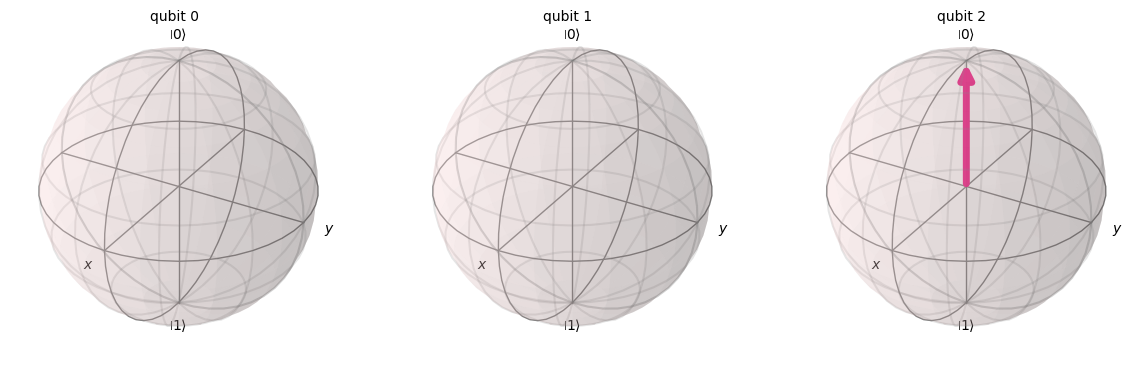

In [6]:
# Get the final statevector for Bloch sphere visualization
final_state = Statevector.from_instruction(qc)
plot_bloch_multivector(final_state)
plt.show()

In [7]:
# Apply a final measurement
qc.measure([0, 1, 2], [0, 1, 2])

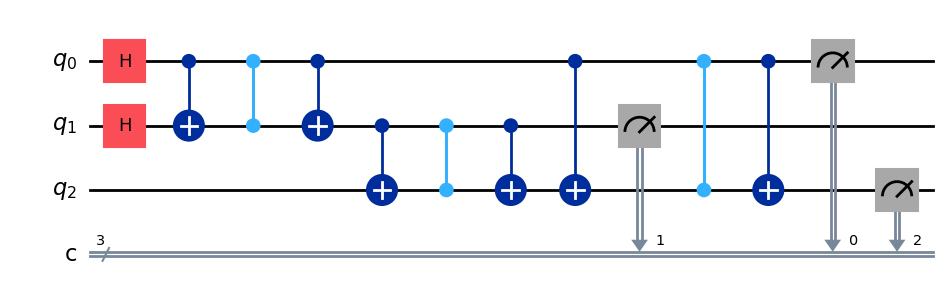

In [8]:
# Visualize the circuit
qc.draw('mpl')
plt.show()

In [9]:
# Simulate the circuit using AerSimulator
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit).result()

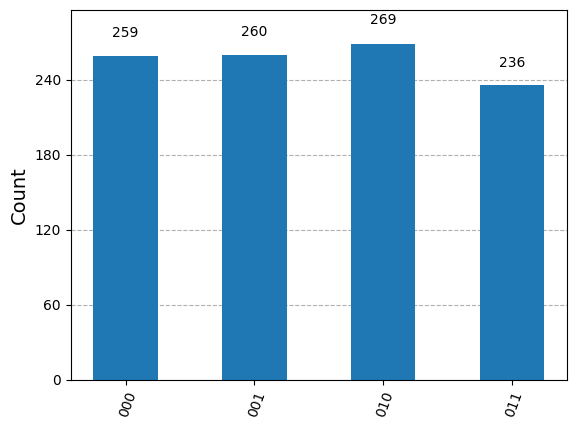

In [10]:
# Get and plot the results
counts = result.get_counts()
plot_histogram(counts)
plt.show()